In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from IPython.display import display

import warnings
warnings.filterwarnings("ignore")



In [3]:
housing_df=pd.read_csv (r'C:\Users\DELL\Desktop\Flip_Robo\task_14-10-22\Project-Housing--2---1---1-\Project-Housing_splitted\train.csv')

In [4]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [5]:
housing_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
pd.set_option('display.max_rows', 500)
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [7]:
#check statical summery
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1104.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1978.193841,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,24.890704,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# separating numerical and categorical features
housing_numeric_df=housing_df.select_dtypes(include=['int64', 'float64'])
housing_categorical_df = housing_df.select_dtypes(include=['object'])

In [9]:
#Only Numeric features in datafarame
housing_numeric_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [10]:
#Checking percentage of Outliers in numerical dataframe

outliers_percentage={}
for feature in housing_numeric_df.columns:
    IQR=housing_numeric_df[feature].quantile(.75)-housing_numeric_df[feature].quantile(.25)
    outliers_count=housing_numeric_df[(housing_numeric_df[feature]>(housing_numeric_df[feature].quantile(.75)+1.5*IQR)) | (housing_numeric_df[feature]<(housing_numeric_df[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/housing_numeric_df.shape[0]*100,2)
    
    outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())}) 
    outlier_df.sort_values(by="Percentage", ascending=False)

In [11]:
outlier_df

,Features,Percentage
0,Id,0.00
1,MSSubClass,6.76
2,LotFrontage,6.16
3,LotArea,6.08
4,OverallQual,0.17
5,OverallCond,8.90
6,YearBuilt,0.51
7,YearRemodAdd,0.00
8,MasVnrArea,6.59
9,BsmtFinSF1,0.60


Comment:

-Most of the numeric value have outliers
-Drouping all the outliers causes loss of information
-Hence reassigning fixed minimum and maximum values to those rows where feature value is outside the range of [25th percentile - 1.5 * IQR, 75th percentile + 1.5 * IQR]
-IQR or Inter Quartile Range = Difference between 75th percentile and 25th percentile values of a feature.
-Target column 'SalePrice' is excluded in this



In [12]:
for feature,percentage in outliers_percentage.items(): 
    if feature!='SalePrice': 
        IQR = housing_df[feature].quantile(.75) - housing_df[feature].quantile(.25)
        max_value = housing_df[feature].quantile(.75)+1.5*IQR 
        min_value = housing_df[feature].quantile(.25)-1.5*IQR 
        housing_df[feature][housing_df[feature] > max_value] = max_value 
        housing_df[feature][housing_df[feature] < min_value ] = min_value

In [13]:
# Checking Dataframe after reassiging maximum and minmum value
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,1168.0,1168.000000,1168.000000,1168.000000,1168.000000,1168.0,1168.000000,1168.000000,1168.0,1168.000000,1168.000000,1168.000000,1168.0,1168.000000,1168.000000,1104.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.0,1168.0,1168.0,1168.0,1168.0,1168.000000,1168.000000,1168.000000
mean,724.136130,54.982877,69.894130,9671.869435,6.106164,5.566781,1970.958904,1984.758562,87.333333,440.206978,0.0,566.375000,1052.938784,1162.847603,348.576199,0.0,1513.293129,0.425086,0.0,1.562500,0.388699,2.869007,1.0,6.517979,0.615154,1978.193841,1.774829,474.148973,93.913099,42.927226,0.0,0.0,0.0,0.0,0.0,6.344178,2007.804795,181477.005993
std,416.159877,37.149385,19.241774,3514.692231,1.384464,0.973862,30.061548,20.785185,130.890807,434.416564,0.0,439.496251,393.359425,361.478549,438.797079,0.0,481.471291,0.519702,0.0,0.551882,0.504929,0.761070,0.0,1.528821,0.643511,24.890704,0.741001,206.578078,117.913672,53.496965,0.0,0.0,0.0,0.0,0.0,2.686352,1.329738,79105.586863
min,1.000000,20.000000,30.000000,1780.500000,2.000000,3.500000,1885.000000,1950.000000,0.000000,0.000000,0.0,0.000000,60.250000,334.000000,0.000000,0.0,334.000000,0.000000,0.0,0.000000,0.000000,0.500000,1.0,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.000000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.0,216.000000,799.000000,892.000000,0.000000,0.0,1143.250000,0.000000,0.0,1.000000,0.000000,2.000000,1.0,5.000000,0.000000,1961.000000,1.000000,338.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.000000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.0,474.000000,1005.500000,1096.500000,0.000000,0.0,1468.500000,0.000000,0.0,2.000000,0.000000,3.000000,1.0,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,24.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.000000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.0,816.000000,1291.500000,1392.000000,729.000000,0.0,1795.000000,1.000000,0.0,2.000000,1.000000,3.000000,1.0,7.000000,1.000000,2002.000000,2.000000,576.000000,171.000000,70.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,215000.000000
max,1460.000000,145.000000,110.000000,17356.500000,10.000000,7.500000,2010.000000,2010.000000,400.000000,1786.250000,0.0,1716.000000,2030.250000,2142.000000,1822.500000,0.0,2772.625000,2.500000,0.0,3.000000,2.000000,4.500000,1.0,10.000000,2.500000,2010.000000,3.500000,933.000000,427.500000,175.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,755000.000000


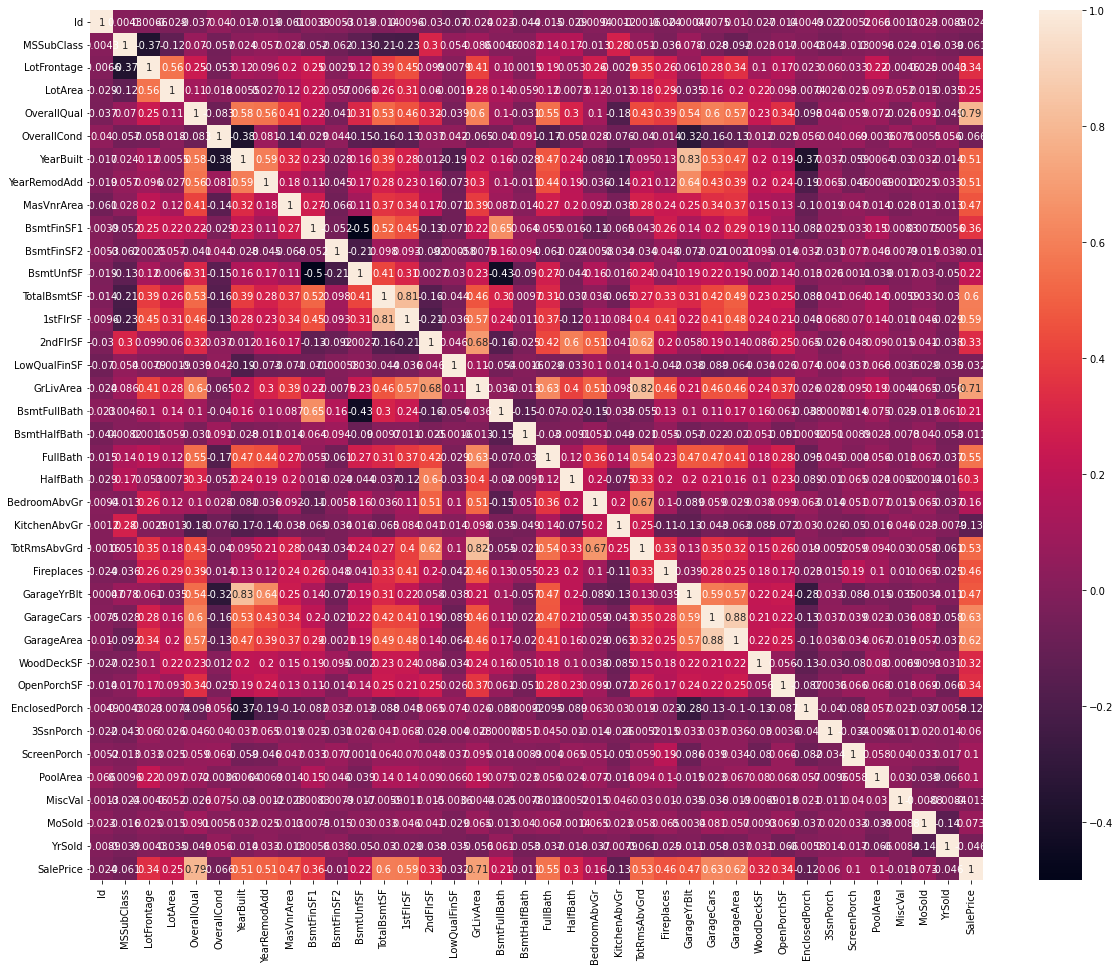

In [14]:
#correlation in Numeric data
plt.figure(figsize=(20,16))
sns.heatmap(housing_numeric_df.corr(),annot=True)
plt.show()

-Some feature have high correlatoin with each other
-GarageCars and GarageArea (0.88) 
-GarageYrBlt and YearBuilt (0.83) 
-TotRmsAbvGrd and GrLivArea (0.83)
-TotalBsmtSF and 1stflrSF (0.82)

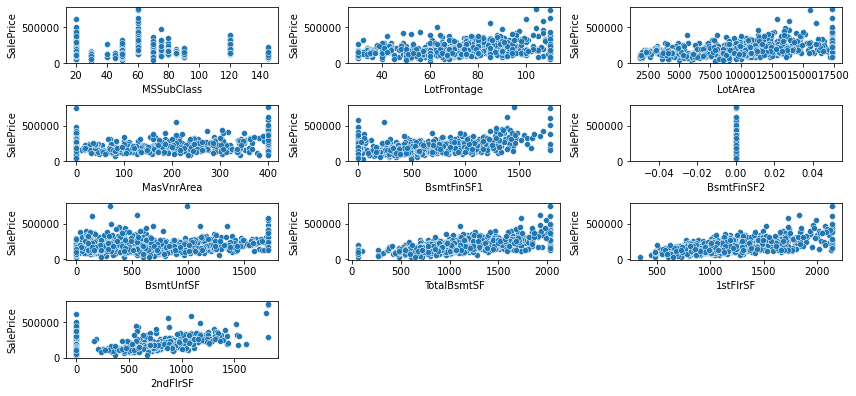

In [15]:
#Analyzing Numerical Features with continuous values

fig=plt.subplots(figsize=(12, 12))
for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']):
    plt.subplot(9, 3, i+1) 
    plt.subplots_adjust(hspace = 2.0) 
    sns.scatterplot(housing_df[feature], housing_df['SalePrice']) 
    plt.tight_layout()

-Features like 'LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF' are showing positive correlation with SalePrice.
-'MSSubClass' has discrete values
-'BsmtSF2' has single value and can be dropped.

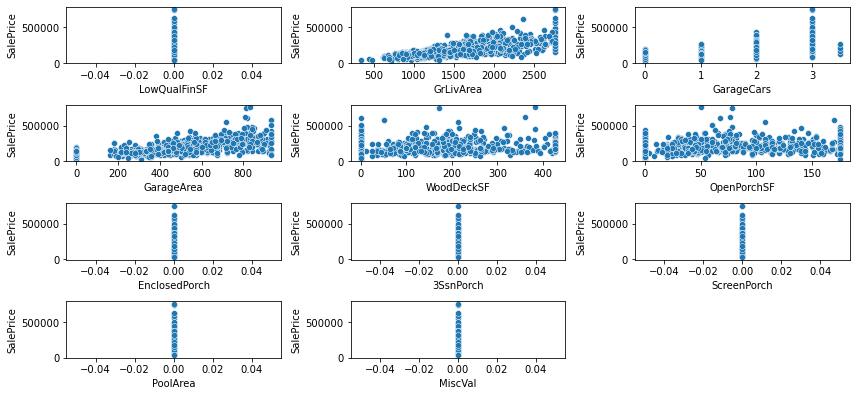

In [16]:
fig=plt.subplots(figsize=(12, 12)) 
for i, feature in enumerate(['LowQualFinSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(housing_df[feature], housing_df['SalePrice'])
    plt.tight_layout()

-'GrLivArea' and 'GarageArea' are showing positive correlation with SalePrice.
-'LowQualFinSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal' features have single values and can be dropped.

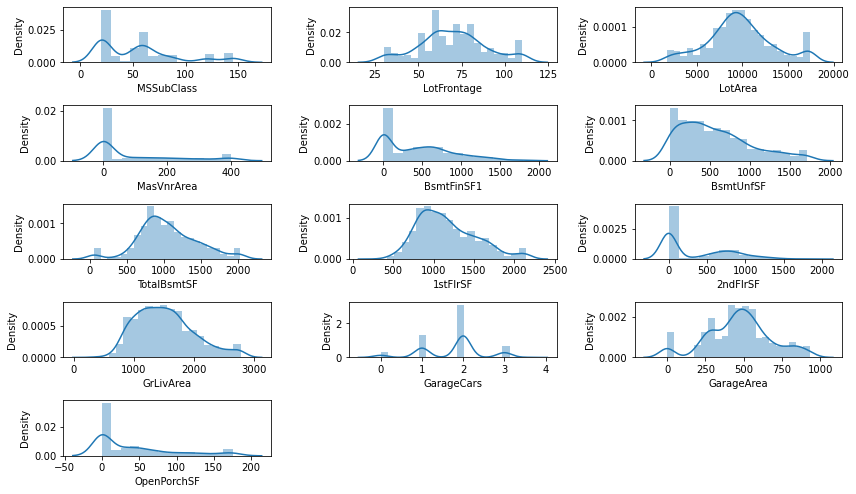

In [17]:
#  Visualizing the distribution of the numeric features

fig=plt.subplots(figsize=(12, 12)) 
for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','GrLivArea', 'GarageCars', 'GarageArea', 'OpenPorchSF']): 
    plt.subplot(9, 3, i+1) 
    plt.subplots_adjust(hspace = 2.0) 
    sns.distplot(housing_df[feature]) 
    plt.tight_layout()

In [18]:
housing_df[[ 'LowQualFinSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].describe()

,LowQualFinSF,GrLivArea,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1168.0,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.0,1168.0,1168.0,1168.0,1168.0
mean,0.0,1513.293129,1.774829,474.148973,93.913099,42.927226,0.0,0.0,0.0,0.0,0.0
std,0.0,481.471291,0.741001,206.578078,117.913672,53.496965,0.0,0.0,0.0,0.0,0.0
min,0.0,334.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,1143.250000,1.000000,338.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,1468.500000,2.000000,480.000000,0.000000,24.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,1795.000000,2.000000,576.000000,171.000000,70.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,2772.625000,3.500000,933.000000,427.500000,175.000000,0.0,0.0,0.0,0.0,0.0


In [19]:
# Removing these features having fixed values as they won't contribute in predicting SalePrice
housing_df.drop(['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True) 

# Checking the remaining columns 
housing_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF',

In [20]:
#  Analyzing Numerical Features with Discrete Values

housing_df[['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']]

,OverallQual,OverallCond,MoSold,YrSold,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,YearBuilt,YearRemodAdd
0,6,5.0,2,2007,0.0,0,2,0,2.0,1,5,1.0,1977.0,1976,1976
1,8,6.0,10,2007,1.0,0,2,0,4.0,1,8,1.0,1970.0,1970,1970
2,7,5.0,6,2007,1.0,0,2,1,3.0,1,8,1.0,1997.0,1996,1997
3,6,6.0,1,2010,0.0,0,2,0,3.0,1,7,1.0,1977.0,1977,1977
4,6,7.0,6,2009,0.0,0,2,0,3.0,1,8,1.0,1977.0,1977,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,5,5.0,2,2010,0.0,0,1,0,3.0,1,5,0.0,1970.0,1967,1967
1164,4,5.0,5,2009,0.0,0,2,0,2.0,1,5,0.0,2002.0,1949,2003
1165,6,6.0,7,2009,0.0,0,2,1,3.0,1,7,1.0,1976.0,1976,1976
1166,4,4.0,7,2008,0.0,0,1,0,3.0,1,6,0.0,1920.0,1920,1950


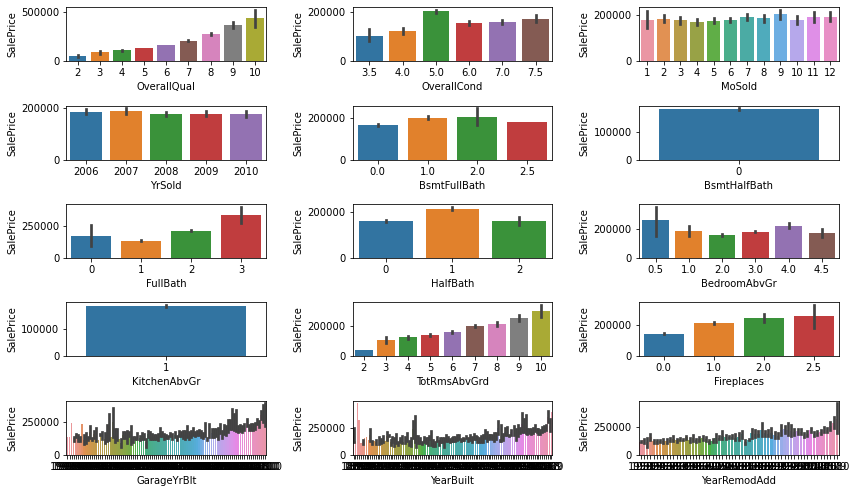

In [21]:
fig=plt.subplots(figsize=(12, 12))
for i, feature in enumerate(['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']):
    plt.subplot(9, 3, i+1) 
    plt.subplots_adjust(hspace = 2.0) 
    sns.barplot(housing_df[feature], housing_df['SalePrice']) 
    plt.tight_layout()

Observations

-'OverallQual' : More the rating of this feature, more the SalePrice (target variable)
-'OverallCond' : SalePrice is highest for rating 5 
-'MoSold' and 'YrSold': SalePrice does not show a strong trend depending on month and year on which realty is sold
-'FullBath' = 2 and 'HalfBath' = 1 have highest SalePrice
-'TotRmsAbvGrd' : More the number of total rooms above grade more the Sale Price
-'GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold' : Will extract new features from to identify any trend
-'BsmtFullBath', 'KitchenAbvGr' : Need further inspection for meaningful insight

In [23]:
housing_df[['BsmtFullBath', 'KitchenAbvGr','GarageYrBlt','YearBuilt','YearRemodAdd']].describe()

,BsmtFullBath,KitchenAbvGr,GarageYrBlt,YearBuilt,YearRemodAdd
count,1168.000000,1168.0,1104.000000,1168.000000,1168.000000
mean,0.425086,1.0,1978.193841,1970.958904,1984.758562
std,0.519702,0.0,24.890704,30.061548,20.785185
min,0.000000,1.0,1900.000000,1885.000000,1950.000000
25%,0.000000,1.0,1961.000000,1954.000000,1966.000000
50%,0.000000,1.0,1980.000000,1972.000000,1993.000000
75%,1.000000,1.0,2002.000000,2000.000000,2004.000000
max,2.500000,1.0,2010.000000,2010.000000,2010.000000


In [24]:
print(housing_df['BsmtFullBath'].value_counts()) 
print(housing_df['KitchenAbvGr'].value_counts())

0.0    686
1.0    468
2.0     13
2.5      1
Name: BsmtFullBath, dtype: int64
1    1168
Name: KitchenAbvGr, dtype: int64


In [25]:
# dropping KitchenAbvGr for not having useful information 
housing_df.drop(['KitchenAbvGr'], axis=1, inplace=True)

In [26]:
housing_df[['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']].describe()

,GarageYrBlt,YearBuilt,YearRemodAdd,YrSold
count,1104.000000,1168.000000,1168.000000,1168.000000
mean,1978.193841,1970.958904,1984.758562,2007.804795
std,24.890704,30.061548,20.785185,1.329738
min,1900.000000,1885.000000,1950.000000,2006.000000
25%,1961.000000,1954.000000,1966.000000,2007.000000
50%,1980.000000,1972.000000,1993.000000,2008.000000
75%,2002.000000,2000.000000,2004.000000,2009.000000
max,2010.000000,2010.000000,2010.000000,2010.000000


In [27]:
# Converting the year related features into number of years 

for feature in ['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']: 
    housing_df[feature] = 2021 - housing_df[feature]

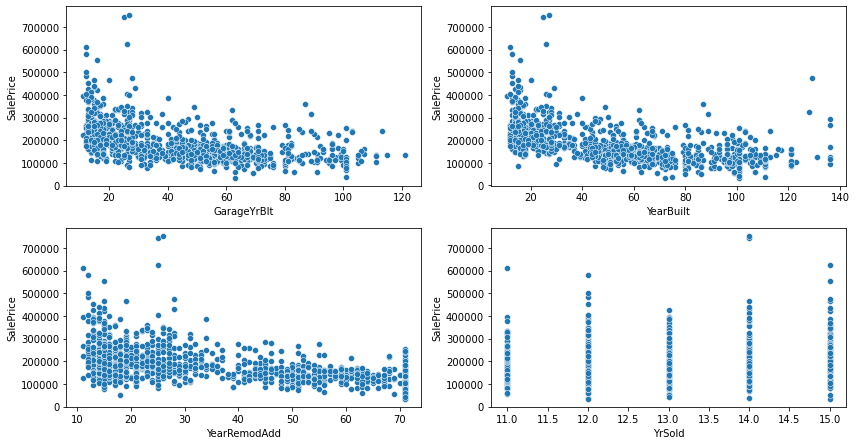

In [28]:
fig=plt.subplots(figsize=(12, 12)) 
for i, feature in enumerate(['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 2.0) 
    sns.scatterplot(housing_df[feature], housing_df['SalePrice']) 
    plt.tight_layout()

Observation

-For most the realty properties Garage is built within last 20 years, SalePrice is more recently built garages
-SalePrice is more lower value of YearBuilt i.e. more recently build houses 
-Recently remodelled houses (lower value of YearRemodAdd) have higher SalePrice
-YrSold still does not show any significant trend

In [29]:
# Missing Value Handling - Numerical Features

print("Feature : Percentage of Missing Value") 
print("=====================================") 
for feat in housing_df.select_dtypes(exclude=['object']).columns: 
    if housing_df[feat].isnull().any():
        print(feat, ' : ',  round(housing_df[feat].isnull().sum()/housing_df.shape[0], 2)*100)

Feature : Percentage of Missing Value
LotFrontage  :  18.0
MasVnrArea  :  1.0
GarageYrBlt  :  5.0


In [30]:
# Since MasVnrArea has only 1% data missing, dropping rows with NULL values in MasVnrArea 
# Dropping Id column as it does not contribute towards predicting SalePrice 

housing_df = housing_df[~housing_df['MasVnrArea'].isnull()] 
housing_df.drop(['Id'], axis=1, inplace=True) 
housing_numeric_df.drop(['Id'], axis=1, inplace=True)

In [31]:
# Checking the number of remaining columns 

housing_df.columns.shape

(73,)

Conclusion

-GarageCars and GarageArea (Correlation coefficient = 0.88), dropping GarageCars 
-GarageYrBlt and YearBuilt (Correlation coefficient = 0.83), dropping GarageYrBlt for high correlation and containing missing value 
-TotRmsAbvGrd and GrLivArea (Correlation coefficient = 0.83), dropping GrLivArea
-TotalBsmtSF and 1stflrSF (Correlation coefficient = 0.82), dropping TotalBsmtSF
-Missing Value Imputation to be done for housing_df['LotFrontage'] after splitting data into train and test set to avoid data leakage.

In [32]:
housing_df.drop(['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)

# Checking the number of remaining columns 
print(housing_df.columns.shape)

(69,)


Analyzing Categorical feature

In [33]:
#categorical feature in dataframe


In [34]:
housing_categorical_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [35]:
# Missing Value Handling - Categorical Features

print("Feature : Percentage of Missing Value") 
print("=====================================")
for feat in housing_df.select_dtypes(include=['object']).columns: 
    if housing_df[feat].isnull().any(): 
        print(feat, ':', round(housing_df[feat].isnull().sum()/housing_df.shape[0], 2)*100)

Feature : Percentage of Missing Value
Alley : 93.0
BsmtQual : 3.0
BsmtCond : 3.0
BsmtExposure : 3.0
BsmtFinType1 : 3.0
BsmtFinType2 : 3.0
FireplaceQu : 47.0
GarageType : 6.0
GarageFinish : 6.0
GarageQual : 6.0
GarageCond : 6.0
PoolQC : 99.0
Fence : 80.0
MiscFeature : 96.0


In [36]:
housing_categorical_df['Electrical'].isnull().sum()

0

In [37]:
housing_df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

-for 'Alley', Nan means 'No access to alley' 
-For 'BsmtQual', 'BsmtCond', BsmtExposure, BsmtFinType1, BsmtFinType2 Nan means 'No basement' 
-For GarageType, GarageFinish, GarageQual, GarageCond Nan means 'No garage' 
-For 'FireplaceQu' and 'Fence' Nan means 'No Fire place' and 'No fence' respectively 
-MiscFeature - Nan means no additional features mentioned. 
-All these features will be imputed with meaningful values in place of missing data.

In [38]:
mv_categorical_features = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'FireplaceQu' ,'Fence' ,'MiscFeature'] 
print(housing_df[mv_categorical_features].isnull().sum())

Alley           1085
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinType2      31
GarageType        64
GarageFinish      64
GarageQual        64
GarageCond        64
FireplaceQu      548
Fence            924
MiscFeature     1117
dtype: int64


In [39]:
# Imputing missing values with "Not_applicable" 
housing_df[mv_categorical_features] = housing_df[mv_categorical_features].fillna(value='Not_applicable', axis=1) 

# Checking after imputation 
print(housing_df[mv_categorical_features].isnull().sum())

Alley           0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
FireplaceQu     0
Fence           0
MiscFeature     0
dtype: int64


In [40]:
# dropping 'PoolQC' for very high percentage of missing value and highly imbalance data (if missing value is imputed) 
housing_df.drop(['PoolQC'], axis=1, inplace=True)


In [41]:
#dropping rows with null values in 'Electrical', for very low missing value count 
housing_df.dropna(subset=['Electrical'], inplace=True)

In [42]:
housing_df.columns.shape

(68,)

In [43]:
# Function to generate boxplot for SalePrice against different features given the list of features 

def generate_boxplot(feature_list):
    fig=plt.subplots(figsize=(20, 16)) 
    for i, feature in enumerate(feature_list): 
        plt.subplot(4, 2, i+1) 
        plt.subplots_adjust(hspace = 2.0) 
        sns.boxplot(housing_df['SalePrice'], housing_df[feature]) 
        plt.tight_layout()

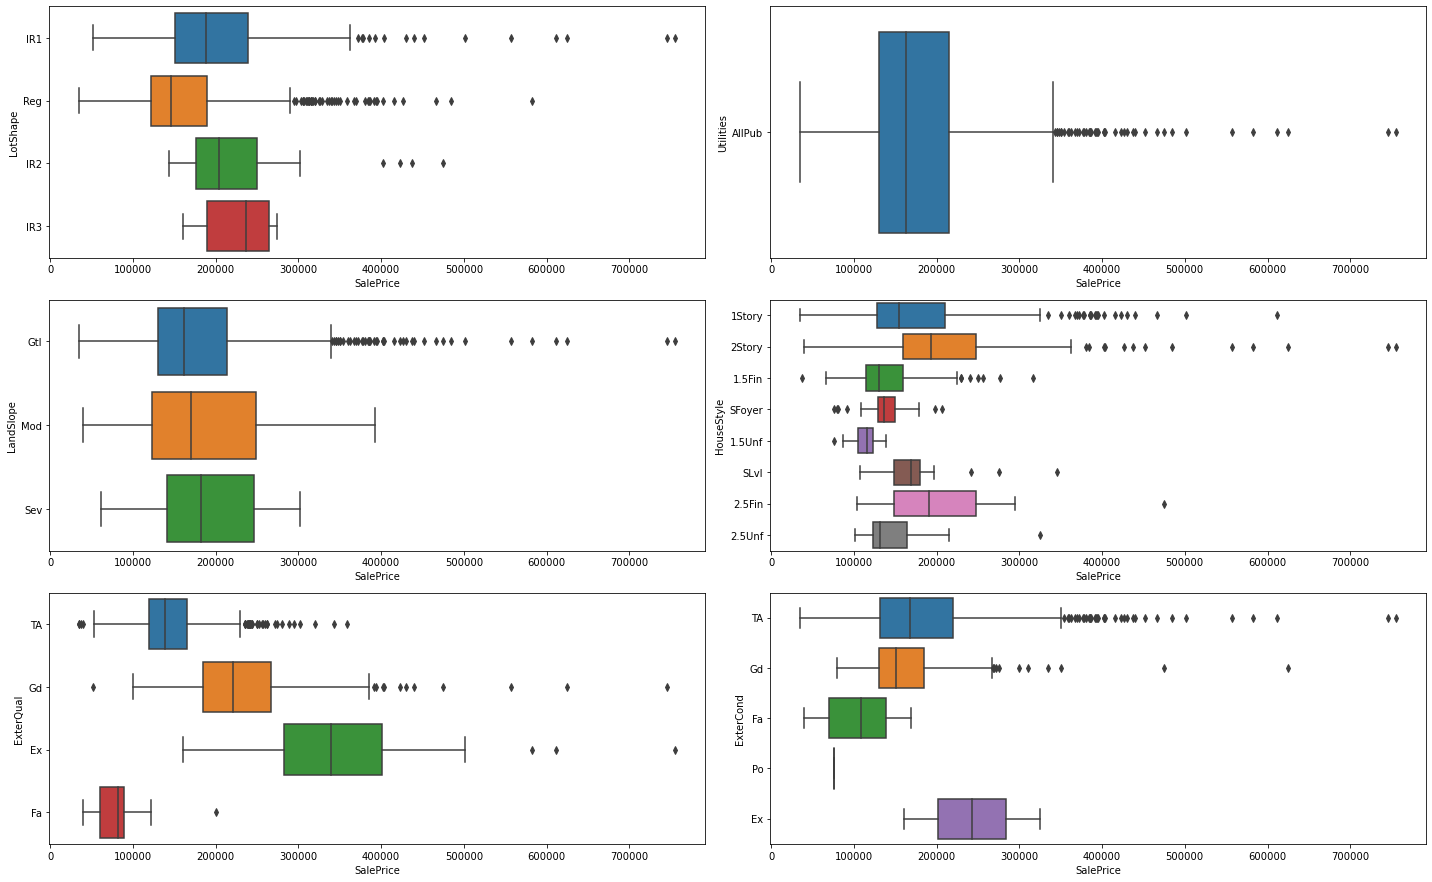

In [44]:
ext_features = ['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond'] 
generate_boxplot(ext_features)

Observations

-'LotShape' : Slightly irregular LotShape have the highest SalePrice 
-'Utilities' : Most of the houses in the dataset have all the public utilities 
-'LandSlope' : Houses at severe land slope have lowest SalePrice 
-'HouseStyle' : 2 storied houses have the highest SalePrice 
-'ExterQual' : Houses with Excellent quality of material on the exterior have the highest SalePrice 
-'ExterCond' : Houses with Excellent condition of material on the exterior have the highest SalePrice

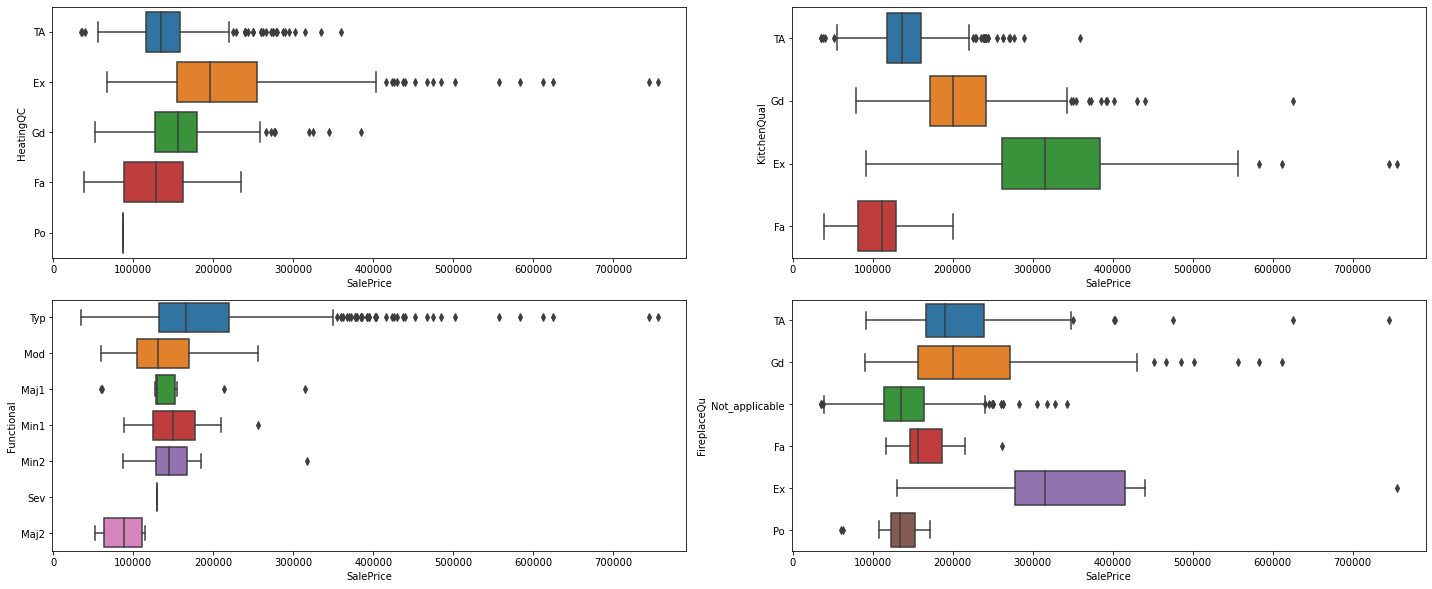

In [45]:
int_features = ['HeatingQC', 'KitchenQual','Functional','FireplaceQu'] 
generate_boxplot(int_features)

Observation

-Houses having excellent heating quality and kitchen quality have the highest SalePrice 
-Houses with typical functionality have highest SalePrice. There are very few houses that are severely damaged.
-SalePrice range in largest for houses with average fireplace quality.

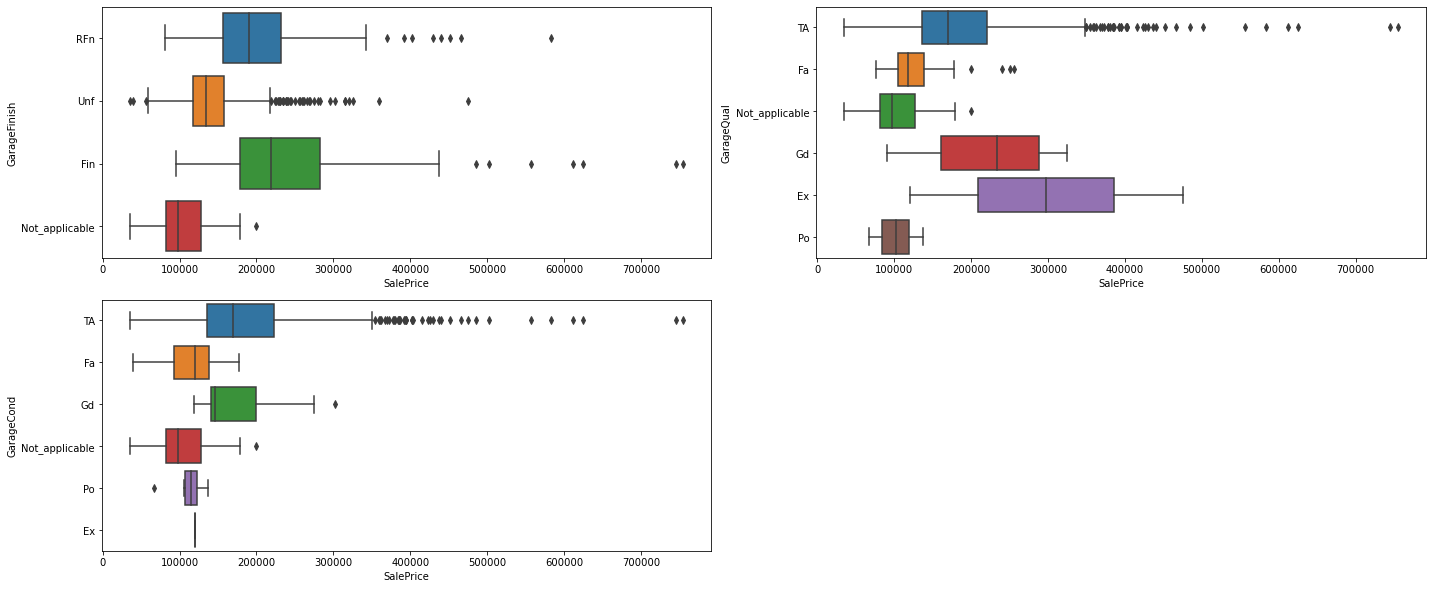

In [46]:
garage_features = ['GarageFinish', 'GarageQual','GarageCond'] 
generate_boxplot(garage_features)

Observation

-SalePrice is highest where garage is finished. 
-The range of SalePrice is widest for Typical/Average Garage quality and condition. 
-There are very few houses with excellect condition of garage.

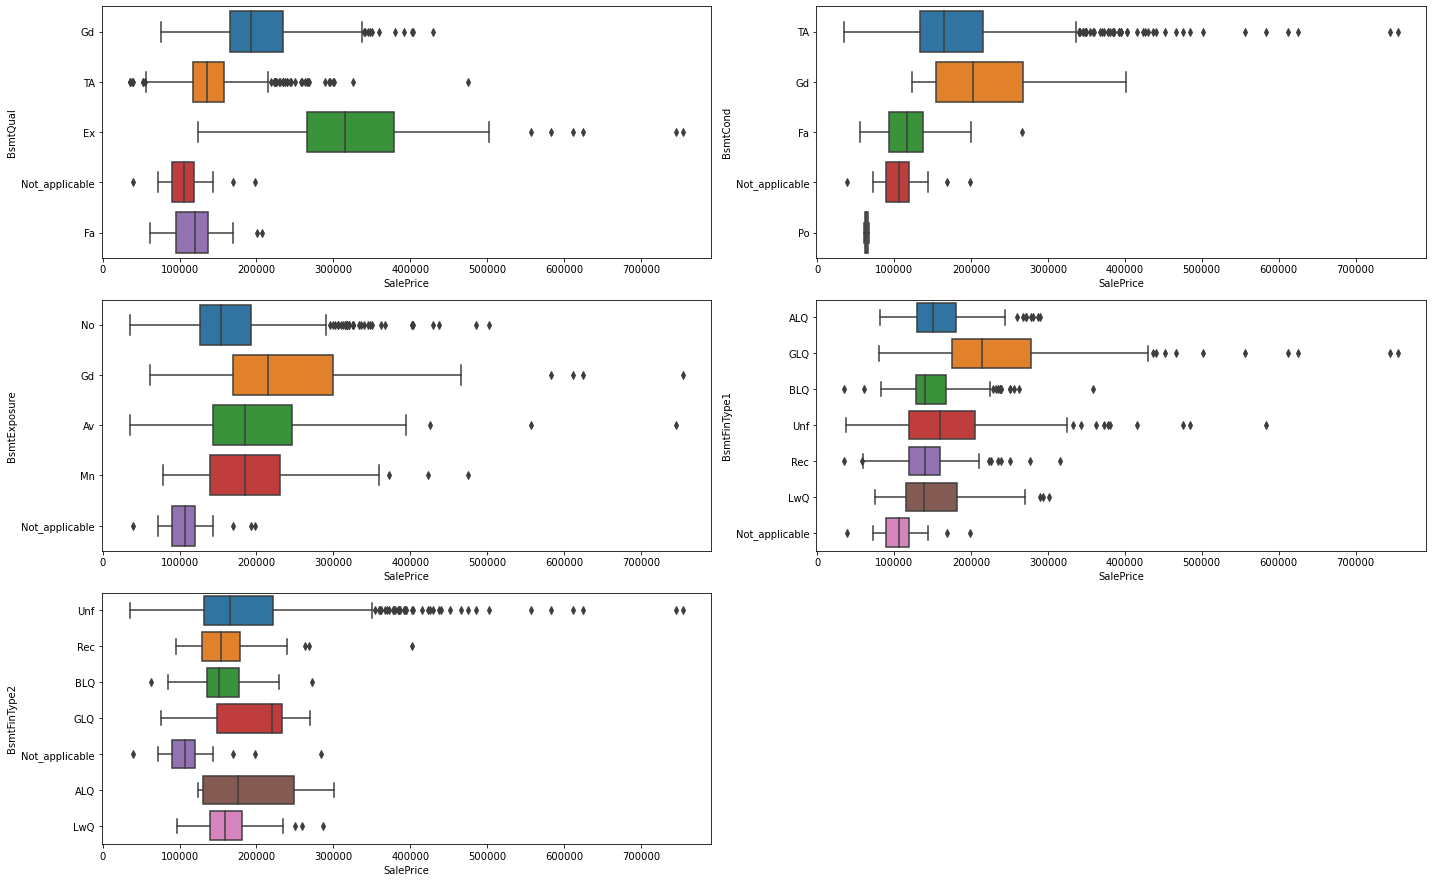

In [47]:
basement_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'] 
generate_boxplot(basement_features)

In [48]:
#Encoding categorical feature

housing_df['LotShape'] = housing_df['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3}) 
housing_df['Utilities'] = housing_df['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0}) 
housing_df['LandSlope'] = housing_df['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2}) 
housing_df['HouseStyle'] = housing_df['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7}) 
housing_df['ExterQual'] = housing_df['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}) 
housing_df['ExterCond'] = housing_df['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}) 
housing_df['BsmtQual'] = housing_df['BsmtQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}) 
housing_df['BsmtCond'] = housing_df['BsmtCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}) 
housing_df['BsmtExposure'] = housing_df['BsmtExposure'].map({'Not_applicable':0,'No':1,'Mn':2,'Av':3,'Gd':4}) 
housing_df['BsmtFinType1'] = housing_df['BsmtFinType1'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}) 
housing_df['BsmtFinType2'] = housing_df['BsmtFinType2'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}) 
housing_df['HeatingQC'] = housing_df['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}) 
housing_df['CentralAir'] = housing_df['CentralAir'].map({'N':0,'Y':1}) 
housing_df['KitchenQual'] = housing_df['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}) 
housing_df['GarageFinish'] = housing_df['GarageFinish'].map({'Not_applicable':0,'Unf':1,'RFn':2,'Fin':3}) 
housing_df['GarageQual'] = housing_df['GarageQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}) 
housing_df['GarageCond'] = housing_df['GarageCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}) 
housing_df['Functional'] = housing_df['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7}) 
housing_df['FireplaceQu'] = housing_df['FireplaceQu'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [49]:
# Checking the features after encoding 
housing_df[['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1161 entries, 0 to 1167
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotShape      1161 non-null   int64
 1   Utilities     1161 non-null   int64
 2   LandSlope     1161 non-null   int64
 3   HouseStyle    1161 non-null   int64
 4   ExterQual     1161 non-null   int64
 5   ExterCond     1161 non-null   int64
 6   BsmtQual      1161 non-null   int64
 7   BsmtCond      1161 non-null   int64
 8   BsmtExposure  1161 non-null   int64
 9   BsmtFinType1  1161 non-null   int64
 10  BsmtFinType2  1161 non-null   int64
 11  HeatingQC     1161 non-null   int64
 12  KitchenQual   1161 non-null   int64
 13  Functional    1161 non-null   int64
 14  FireplaceQu   1161 non-null   int64
 15  GarageFinish  1161 non-null   int64
 16  GarageQual    1161 non-null   int64
 17  GarageCond    1161 non-null   int64
dtypes: int64(18)
memory usage: 204.6 KB


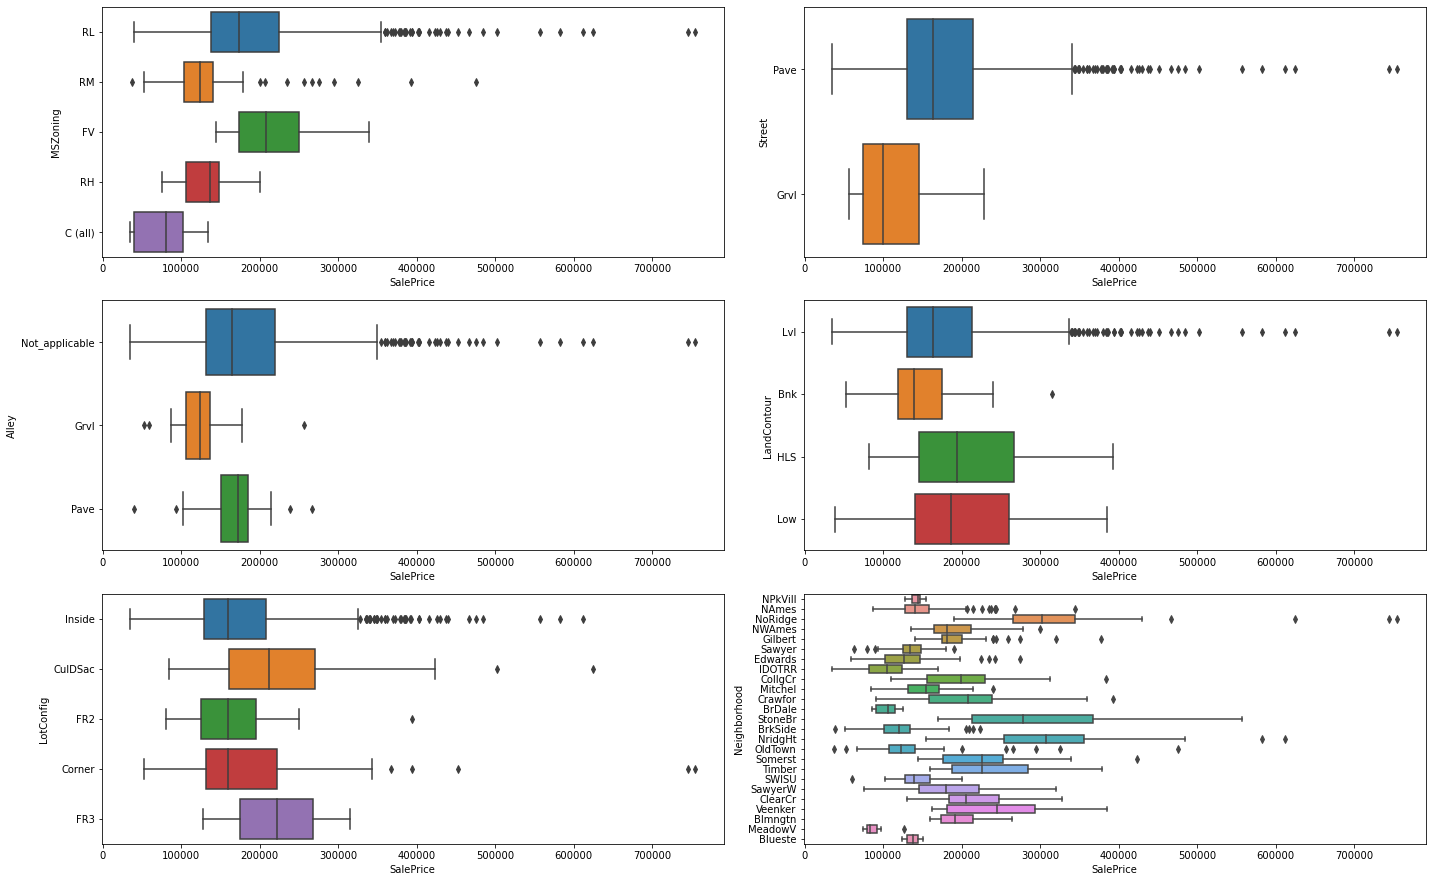

In [50]:
unordered_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2','BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition']
generate_boxplot(['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood'])


Observation

-Most of the houses do not have alley 
-Neighborhood has a lot of labels, using one hot encoding directly would lead to high number of additional columns 
-Houses classified as MSZoning = RL or Residential Low density have the highest SalePrice

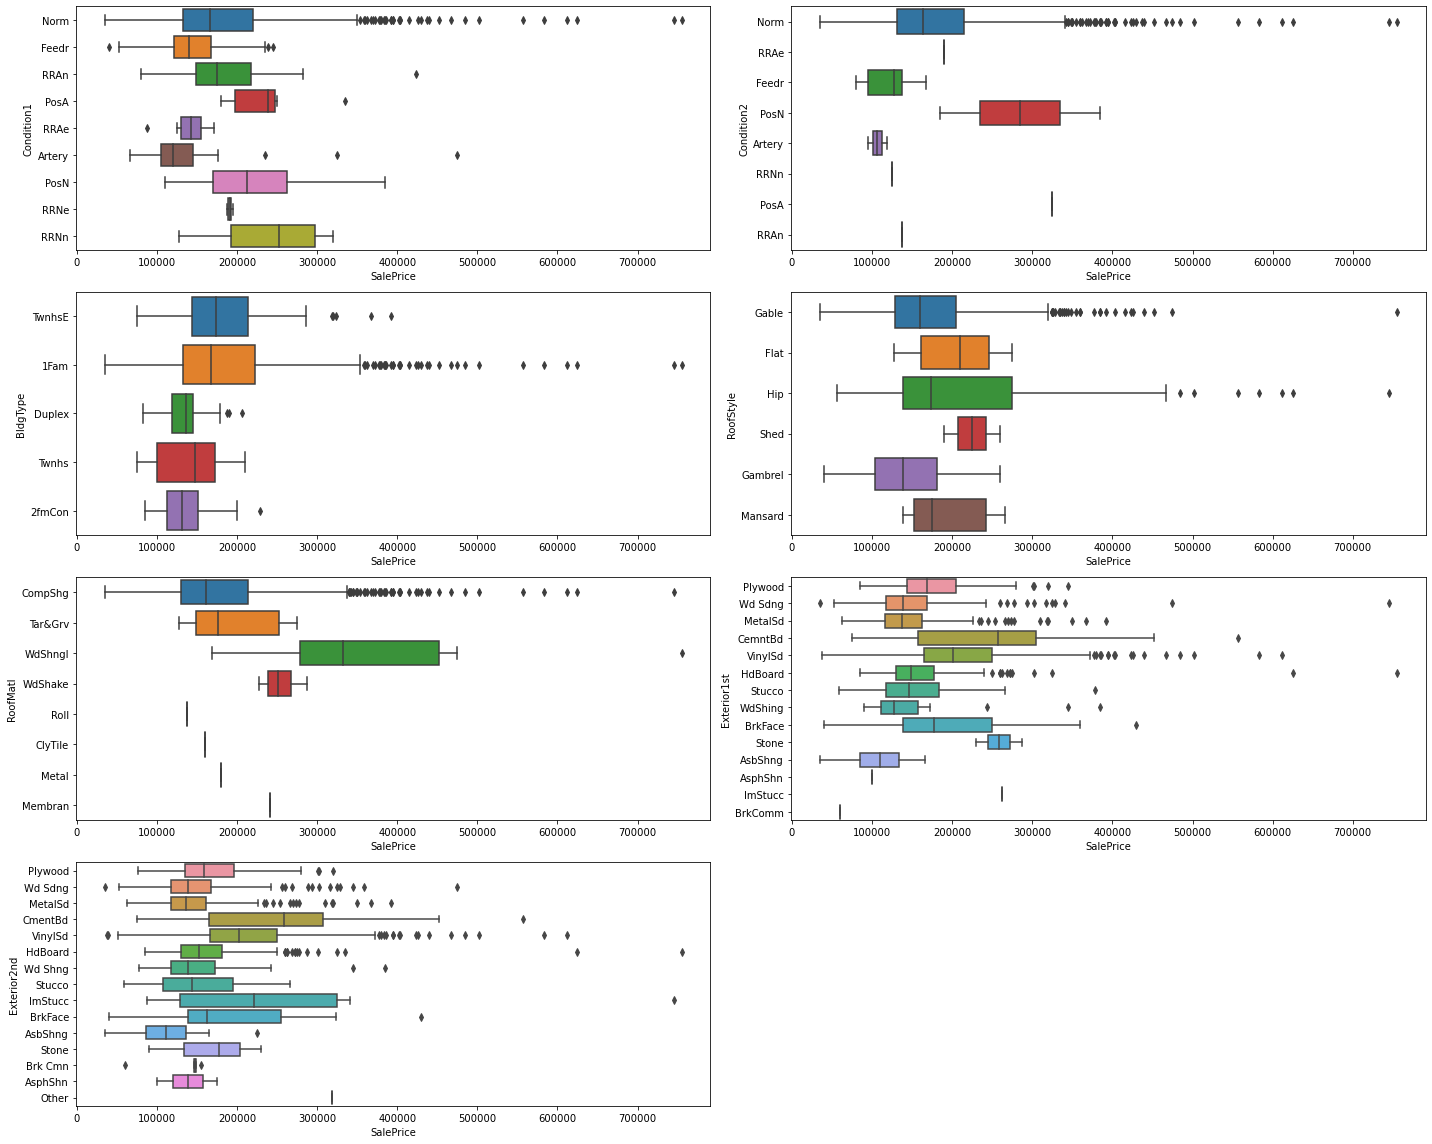

In [51]:
generate_boxplot(['Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd'])

Observation 

-Normal Condition (Condition1 = Norm and Condition2 = Norm) Houses are likely to have high SalePrice
-Features like 'RoofMatl', 'Exterior1st', 'Exterior2nd' have some labels with very few data, this labels cannot contribute in predicting SalePricee.

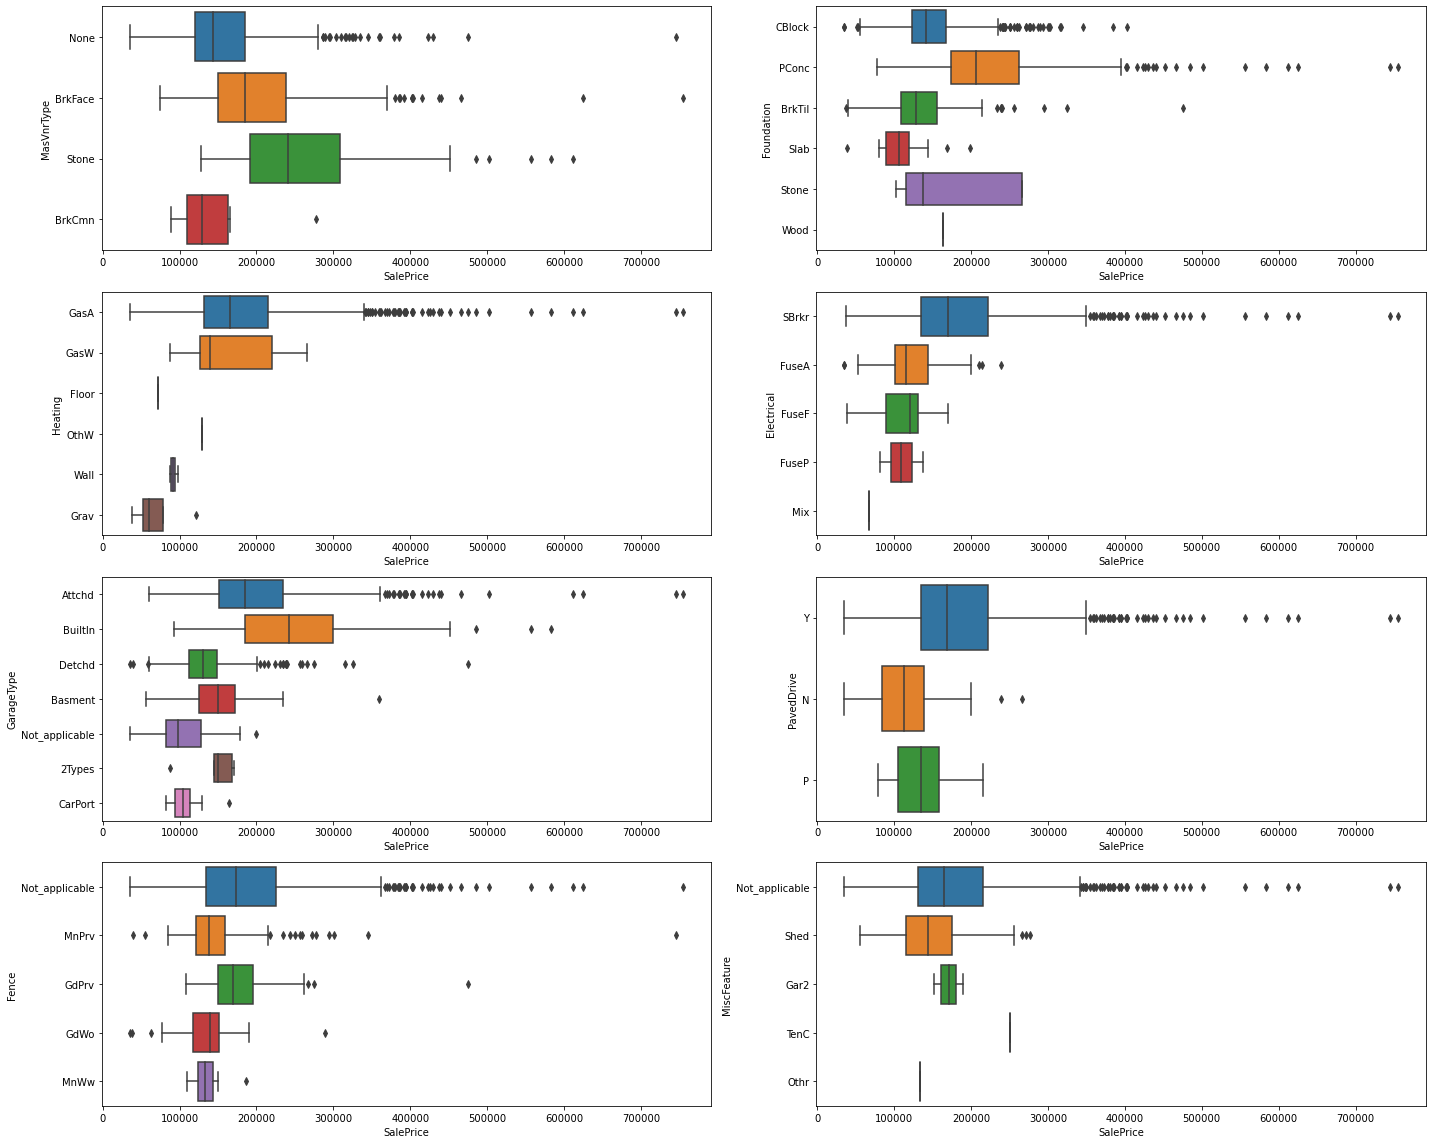

In [52]:
generate_boxplot(['MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature'])

Observation

-Houses with foundation of poured concrete (Foundation = PConc) and/or Electrical with Standard Circuit Breaker and/or Heating type = GasA have the highest price
-Houses with attached and built-in garage have high SalePrice 
-Most of the houses do not have fence (Fence= Not_applicable)

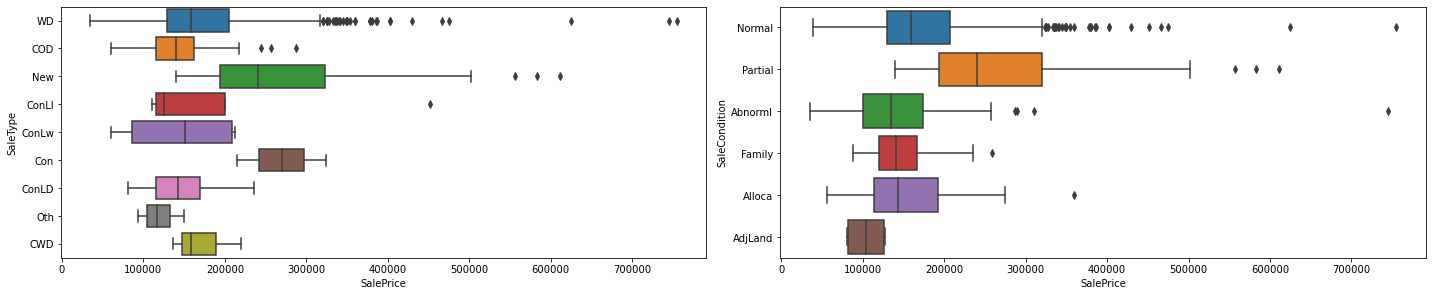

In [53]:
generate_boxplot(['SaleType','SaleCondition'])

ObservATion

-Most of the houses are newly built, houses with warranty deed have high SalePrice
-Sale condition = Normal leads to high SalePrice

In [54]:
#Encoding Categorical  variables

dummy_df = pd.get_dummies(housing_df[unordered_features], drop_first=True)

In [55]:
dummy_df.shape

(1161, 142)

In [56]:
dummies_to_drop = [] 
for feat in dummy_df.columns: 
    if dummy_df[feat].value_counts()[0]/dummy_df.shape[0] >= 0.95: 
        dummies_to_drop.append(feat) 
    
print(dummies_to_drop) 
print(len(dummies_to_drop))

['MSZoning_FV', 'MSZoning_RH', 'Alley_Pave', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',

In [57]:
# dropping the highly imbalanced  dummy varuable

dummy_df = dummy_df.drop(dummies_to_drop, axis=1)
print(dummy_df.shape)

(1161, 52)


In [58]:
housing_df.shape

(1161, 68)

In [59]:
# Adding the dummy variables to the original dataframe 
housing_df = pd.concat([housing_df,dummy_df],axis=1) 

# Dropping the redundant columns "
housing_df = housing_df.drop(unordered_features,axis=1)

In [60]:
housing_df.shape

(1161, 97)

In [61]:
# Spliting data into train and test data set

X= housing_df.drop(['SalePrice'],axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MoSold,YrSold,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Not_applicable,LandContour_Lvl,LotConfig_CulDSac,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,Condition2_Norm,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Hip,RoofMatl_CompShg,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Heating_GasA,Electrical_SBrkr,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_Not_applicable,PavedDrive_Y,Fence_MnPrv,Fence_Not_applicable,MiscFeature_Not_applicable,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,120,NaN,4928.0,0,3,0,0,6,5.0,45,45,0.0,2,2,4,3,1,5,120.0,1,0,958,2,1,958,0.0,0.0,0,2,0,2.0,2,5,0,1.0,3,2,440,3,3,0.0,175,2,14,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,1,1,0,0,0,1,0,1,1,0,1,1,0
1,20,95.0,15865.0,0,3,1,0,8,6.0,51,51,0.0,3,3,3,4,4,5,351.0,3,0,1043,4,1,2142,0.0,1.0,0,2,0,4.0,3,8,0,1.0,3,1,621,3,3,81.0,175,10,14,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,1,1,0,0,0,1,0,1,1,0,1,1,0
2,60,92.0,9920.0,0,3,0,3,7,5.0,25,24,0.0,3,2,4,3,3,6,862.0,1,0,255,4,1,1127,886.0,1.0,0,2,1,3.0,2,8,0,1.0,3,1,455,3,3,180.0,130,6,14,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,0,0,0,1,0,1,1,0,1,1,0
3,20,105.0,11751.0,0,3,0,0,6,6.0,44,44,400.0,2,2,4,3,1,4,705.0,1,0,1139,4,1,1844,0.0,0.0,0,2,0,3.0,2,7,0,1.0,3,2,546,3,3,0.0,122,1,11,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,1,0,0,0,1,1,0,1,0,0,1,0
4,20,NaN,16635.0,0,3,0,0,6,7.0,44,21,126.0,3,2,4,3,1,5,1246.0,1,0,356,3,1,1602,0.0,0.0,0,2,0,3.0,3,8,0,1.0,3,3,529,3,3,240.0,0,6,12,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,1,0,1,1,0,1,1,0


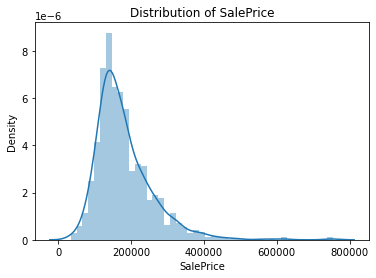

In [62]:
# Checking distribution of Saleprice,target variable

plt.title('Distribution of SalePrice') 
sns.distplot(housing_df['SalePrice']) 
plt.show()

Observation

-SalePrice is highly right skewed,so now check the distribution of transformed SalePrice.

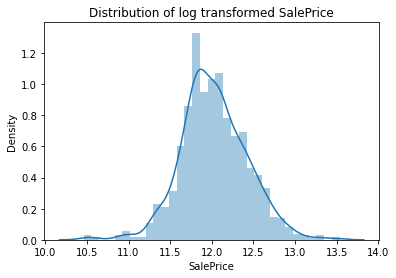

In [63]:
sns.distplot(np.log(housing_df['SalePrice'])) 
plt.title('Distribution of log transformed SalePrice') 
plt.show()

In [64]:
# log transformed SalePrice is normally distributed, hence transformed data will be used for model building 

y = np.log(housing_df['SalePrice']) 
print(y)

0       11.759786
1       12.498742
2       12.505399
3       12.154779
4       12.278393
          ...    
1163    11.711776
1164    11.589887
1165    11.908340
1166    10.596635
1167    12.118334
Name: SalePrice, Length: 1161, dtype: float64


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

In [66]:
print(X_train.shape) 
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(928, 96)
(233, 96)
(928,)
(233,)


In [67]:
X['LotFrontage'].isnull().any()

True

In [68]:
# Imputing missing value of LotFrontage after splitting training and test set to prevent data leakage. 

si = SimpleImputer(missing_values=np.nan, strategy='mean') 
si.fit(X_train[['LotFrontage']])

SimpleImputer()

In [69]:
X_train[['LotFrontage']] = si.transform(X_train[['LotFrontage']])

In [70]:
X_test[['LotFrontage']] = si.transform(X_test[['LotFrontage']])

In [71]:
#Feature Scaling
X_train.values

array([[6.0000e+01, 6.9000e+01, 9.5880e+03, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [6.0000e+01, 7.3000e+01, 8.7600e+03, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0000e+01, 1.1000e+02, 1.4442e+04, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [5.0000e+01, 6.0000e+01, 1.0410e+04, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.2000e+02, 4.0000e+01, 4.6710e+03, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0000e+01, 8.0000e+01, 1.2984e+04, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00]])

In [72]:
ss = StandardScaler() 
ss.fit(X_train)

StandardScaler()

In [73]:
X_tr_scaled = pd.DataFrame(data=ss.transform(X_train), columns=X_train.columns) 
X_te_scaled = pd.DataFrame(data=ss.transform(X_test), columns=X_test.columns)

In [74]:
# Checking the features after  

print(X_tr_scaled) # train data 
print(X_te_scaled) # test dataa

     MSSubClass  LotFrontage   LotArea  LotShape  Utilities  LandSlope  \
0      0.120692    -0.048336 -0.016668 -1.374625        0.0  -0.220360   
1      0.120692     0.179162 -0.252924  0.750281        0.0  -0.220360   
2     -0.945998     2.283521  1.368343  0.750281        0.0  -0.220360   
3      0.120692     0.577284  0.169370  0.750281        0.0  -0.220360   
4     -0.945998     1.146030  1.275038 -1.374625        0.0  -0.220360   
..          ...          ...       ...       ...        ...        ...   
923    2.387410    -0.560207  0.064652  0.750281        0.0  -0.220360   
924    2.387410     0.000000  2.199948  0.750281        0.0   3.245634   
925   -0.145980    -0.560207  0.217876  0.750281        0.0  -0.220360   
926    1.720728    -1.697698 -1.419655 -1.374625        0.0  -0.220360   
927   -0.945998     0.577284  0.952326  0.750281        0.0  -0.220360   

     HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0      0.683176     1.380450    -0.571288

In [75]:
#Initial Feature Selection with RFE

# Given the number of features = n, the functions prints and returns top n features selected by RFE ",

def top_n_features(n): 
    top_n_cols = [] 
     
    linear_m = LinearRegression() 
    linear_m.fit(X_tr_scaled, y_train) 
    rfe = RFE(linear_m, n) 
    rfe = rfe.fit(X_tr_scaled, y_train) 
     
    print("Top %d features : " %n) 
    rfe_ranking = list(zip(X_tr_scaled.columns,rfe.support_,rfe.ranking_)) 
     
    for i in rfe_ranking: 
        if i[1]: 
            top_n_cols.append(i[0]) 
    print(top_n_cols) 
    return top_n_cols

In [76]:
# Checking top 45, 50 and 55 features 
top_45 = top_n_features(45) 
top_50 = top_n_features(50) 
top_55 = top_n_features(55)

Top 45 features : 
['MSSubClass', 'LotArea', 'Utilities', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageArea', 'GarageCond', 'MSZoning_RL', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Norm', 'Condition2_Norm', 'BldgType_TwnhsE', 'Exterior1st_Wd Sdng', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_PConc', 'Electrical_SBrkr', 'GarageType_Attchd', 'GarageType_Detchd', 'GarageType_Not_applicable', 'Fence_MnPrv', 'Fence_Not_applicable', 'SaleCondition_Normal', 'SaleCondition_Partial']
Top 50 features : 
['MSSubClass', 'LotArea', 'Utilities', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'H

In [77]:
# Given the training data and list of features, this will provide the statistical summary of the model 
# This will be used to check adjusted R-square value for top 45, 50 and 55 features 

def build_regressor(X_train,y_train,cols): 
    X_train_ols = sm.add_constant(X_train[cols]) 
    lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit() 
    print(lin_reg.summary())    

In [78]:
build_regressor(X_tr_scaled,y_train,top_45)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     189.3
Date:                Sat, 22 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:35:59   Log-Likelihood:                 637.79
No. Observations:                 928   AIC:                            -1186.
Df Residuals:                     883   BIC:                            -968.1
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

By inspecting adjusted R-square value of linear regression model with top 45, top 50 and top 55 features, top 50 features seem to be optimum as models with 50 and 55 features have the same adjusted R-squared value on the training data.

In [79]:
X_train_rfe = X_tr_scaled[top_50]
X_test_rfe = X_te_scaled[top_50]

In [80]:
# Reusable Code Block for Cross-validation, Model Building and Model Evaluation ",

def build_model(X_train, y_train, X_test, params, model='ridge'): 
    if model == 'ridge': 
        estimator_model = Ridge() 
    else: 
        estimator_model = Lasso() 
    model_cv = GridSearchCV(estimator = estimator_model,  
                          param_grid = params,  
                          scoring= 'neg_mean_absolute_error',  
                          cv = 5,  
                          return_train_score=True, 
                          verbose = 1)             
    model_cv.fit(X_train, y_train) 
    alpha = model_cv.best_params_["alpha"] 
    print("Optimum alpha for %s is %f" %(model, alpha)) 
    final_model = model_cv.best_estimator_ 

    final_model.fit(X_train, y_train) 
    y_train_pred = final_model.predict(X_train) 
    y_test_pred = final_model.predict(X_test) 

# Model Evaluation 
    print(model," Regression with ",alpha) 
    print("===================================") 
    print('R2 score (train) : ',r2_score(y_train,y_train_pred)) 
    print('R2 score (test) : ',r2_score(y_test,y_test_pred)) 
    print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred))) 
    print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred))) 

    return final_model, y_test_pred

In [81]:
# Ridge Regression

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]} 
ridge_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for ridge is 20.000000
ridge  Regression with  20
R2 score (train) :  0.9043444925588576
R2 score (test) :  0.8886191897521352
RMSE (train) :  0.12157398653784413
RMSE (test) :  0.1374823664898095


Observation

-Ridge Regression model was able to achieve R2 score of 0.88 on test data i.e. 88% of the variance in test data can be explained by the model.

Root Mean Square Error = 0.1374 on test data, that means the prediction made by the model can off by 0.1374 unit.",

In [82]:
#Lasso Regression

params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]} 
lasso_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='lasso')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimum alpha for lasso is 0.001000
lasso  Regression with  0.001
R2 score (train) :  0.9038091644214907
R2 score (test) :  0.8903067038306895
RMSE (train) :  0.12191370128578459
RMSE (test) :  0.13643690402839492


In [83]:
# Comparing Model Coefficients

model_coefficients = pd.DataFrame(index=X_test_rfe.columns) 
model_coefficients.rows = X_test_rfe.columns 
model_coefficients['Ridge (alpha=9.0)'] = ridge_final_model.coef_ 
model_coefficients['Lasso (alpha=0.0001)'] = lasso_final_model.coef_ 
pd.set_option('display.max_rows', None) 
model_coefficients

,Ridge (alpha=9.0),Lasso (alpha=0.0001)
MSSubClass,-0.013911,-0.011787
LotArea,0.031820,0.029584
Utilities,0.000000,0.000000
OverallQual,0.078605,0.081936
OverallCond,0.039714,0.040625
YearBuilt,-0.020435,-0.024522
YearRemodAdd,-0.018276,-0.017145
BsmtCond,0.016232,0.015479
BsmtExposure,0.012159,0.010814
BsmtFinType1,0.009598,0.009700


In [84]:
# Converting the predictions to its original scale (anti log) 

test_prediction = np.round(np.exp(y_test_predicted)).astype(int) 
print(test_prediction[:5])

[112938 138603 115856 149368 419113]


Observation
-Lasso Regression produced slightly R2 score on test data than Ridge Regression. Choosing Lasso as the final model.

In [85]:
# Final Model
# 50 features ordered by feature importance in Lasso Regression 

model_coefficients[['Lasso (alpha=0.0001)']].sort_values(by='Lasso (alpha=0.0001)', ascending=False)

,Lasso (alpha=0.0001)
1stFlrSF,0.125886
2ndFlrSF,0.101638
OverallQual,0.081936
OverallCond,0.040625
MSZoning_RL,0.030210
LotArea,0.029584
Neighborhood_Somerst,0.028997
Condition1_Norm,0.025732
BsmtFinSF1,0.024912
GarageArea,0.023762


model_coefficients[['Lasso (alpha=0.0001)']].sort_values(by='Lasso (alpha=0.0001)', ascending=False).index[:10]

Observation

-First the housing data is read and analyzed dividing the features into numerical and categorical types. 

-SalePrice is the target column here. 
-All the features are then analyzed, missing data handling, outlier detection, data cleaning are done. Trend of SalePrice is 
observed for change in individual features. 

-New features are extracted, redundant features dropped and categorical features are encoded accordingly.

-Then the data in split into train and test data and feature scaling is performed.

-Target variable SalePrice is right skewed. Natural log of the same is Normal distributed, hence for model building, natural log of SalePrice is considered. 

-Creating dummy variables increased the number of features greatly, highly imbalanced columns are dropped. 

-Top 50 features are selected through RFE and adjusted R-square. 50 features : 
['MSSubClass', 'LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'HalfBath', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageArea', 'GarageQual', 'OpenPorchSF', 'MSZoning_RL', 'Street_Pave', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Feedr', 'Condition1_Norm', 'Condition2_Norm', 'BldgType_TwnhsE', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_HdBoard', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_PConc', 'Heating_GasA', 'GarageType_Not_applicable', 'PavedDrive_Y', 'SaleCondition_Normal', 'SaleCondition_Partial'] 

-Ridge and Lasso Regression Model are built with optimum alpha calculated in GridSearchCV method. 
-Optimum alpha = 9.0 for ridge and 0.0001 for lasso model. 
-Model evaluation is done with R2 score and Root Mean Square Error. 
-Lasso Regression is chosen as final model for having slightly better R-square value on test data.
-Out of 50 features in the final model, top 10 features in order of descending importance are ['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'SaleCondition_Partial', 'LotArea', 'BsmtFinSF1','SaleCondition_Normal', 'MSZoning_RL', 'Neighborhood_Somerst'] 

-Model coefficients are listed in a table along with the corresponding features , for example natural log of SalePrice will change by 0.124911 with unit change in the feature '1stFlrSF' when all the features remain constant. Negative sign in the coefficient signifies negative correlation between the predictor and target variable.  

-Predicted value of SalePrice is tranformed into its original scale by performing antilog. 

In [86]:
# Model Building 
ridge_model = Ridge(alpha=18.0) 
ridge_model.fit(X_train_rfe, y_train) 
 
# Predicting 
y_train_pred = ridge_model.predict(X_train_rfe) 
y_test_pred = ridge_model.predict(X_test_rfe) 
 
print("Model Evaluation : Ridge Regression, alpha=18.0") 
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4)) 
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4)) 
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4)) 
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Ridge Regression, alpha=18.0
R2 score (train) :  0.9044
R2 score (test) :  0.8888
RMSE (train) :  0.1215
RMSE (test) :  0.1374


In [87]:
lasso_model = Lasso(alpha=0.0002)
lasso_model.fit(X_train_rfe, y_train) 
y_train_pred = lasso_model.predict(X_train_rfe) 
y_test_pred = lasso_model.predict(X_test_rfe) 
 
print("Model Evaluation : Lasso Regression, alpha=0.0002") 
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4)) 
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4)) 
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4)) 
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Lasso Regression, alpha=0.0002
R2 score (train) :  0.9047
R2 score (test) :  0.8901
RMSE (train) :  0.1213
RMSE (test) :  0.1365
